In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn. ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
df=pd.read_csv(r"C:\Users\Umme Rumana\Downloads\archive (2)\gld_price_data.csv")

In [4]:
print(df.head())

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099


In [5]:
print(df.tail())

           Date          SPX         GLD      USO      SLV   EUR/USD
2285   5/8/2018  2671.919922  124.589996  14.0600  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.3700  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.4100  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.3800  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.4058  15.4542  1.182033


In [6]:
df.shape

(2290, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


finding correlation


In [18]:
corr = df.corr(numeric_only=True)


In [19]:
print(corr)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


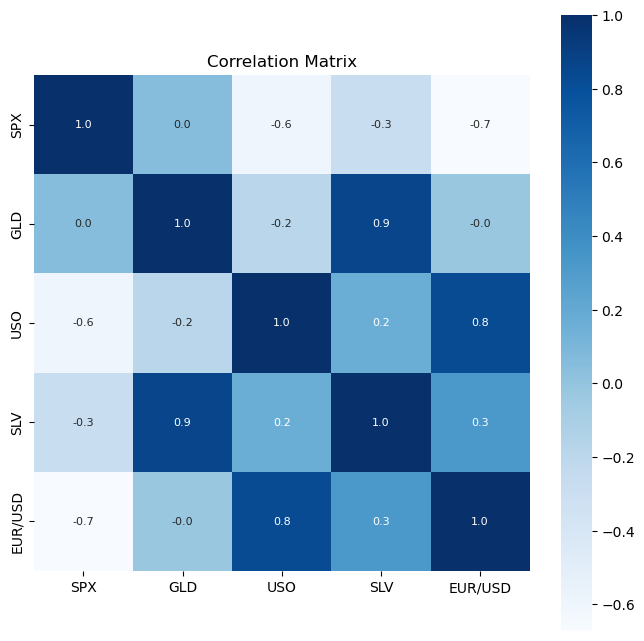

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True, annot=True, fmt=".1f",annot_kws={'size':8}, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

In [22]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Umme Rumana\AppData\Local\Temp\ipykernel_14732\3736964373.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

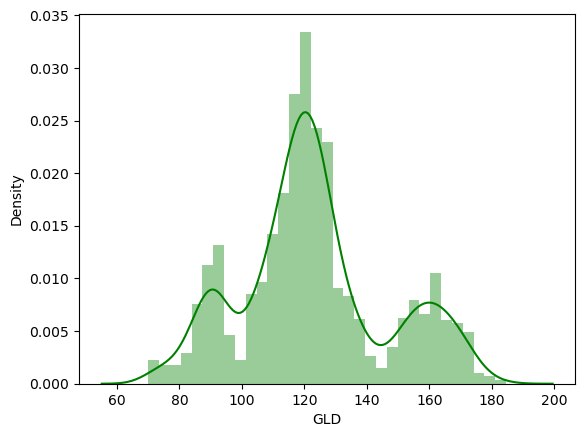

In [25]:
sns.distplot(df['GLD'],color='green')

In [26]:
x=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [27]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)    

In [31]:
model=RandomForestRegressor(n_estimators=100)

In [32]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
test_predict=model.predict(x_test)
print(test_predict)

[168.47389908  82.21259956 116.05630036 127.80030067 120.93940146
 154.62449756 150.27659783 126.19250016 117.34659873 125.91930088
 116.91670116 171.64680115 141.36779821 167.92659878 115.30980027
 118.18720067 137.97200333 169.8082     159.36070274 158.72099979
 155.09540001 125.32159972 175.38940032 157.18770313 125.24000037
  93.65439937  77.88159995 120.57469994 119.13499975 167.51999966
  88.02890031 125.08960002  91.11730091 117.60380011 121.15529899
 136.44280127 115.49710094 115.00700059 147.66459976 107.17100098
 104.41080243  87.32549823 126.43870041 117.90970021 153.25319826
 119.53720014 108.45029969 107.90079821  93.20880047 127.29979739
  74.82630019 113.63549924 121.16280013 111.34089899 118.88579865
 120.82049951 160.13950049 166.90400083 147.02749694  85.88519893
  94.2836002   87.02289895  90.59010008 118.85770058 126.46400022
 127.55469987 168.64280021 122.30509925 117.50129867  98.36760033
 167.99740176 143.17399816 132.78950235 121.24250219 120.81349912
 119.61000

In [36]:
error_score=metrics.r2_score(y_test,test_predict)
print(error_score)

0.9891001077895203


In [37]:
train_predict=model.predict(x_train)
print(train_predict)

[109.95809779 114.85790086  90.63619993 ... 130.70099697 159.55189562
 114.83729961]


In [38]:
y_test=list(y_test)

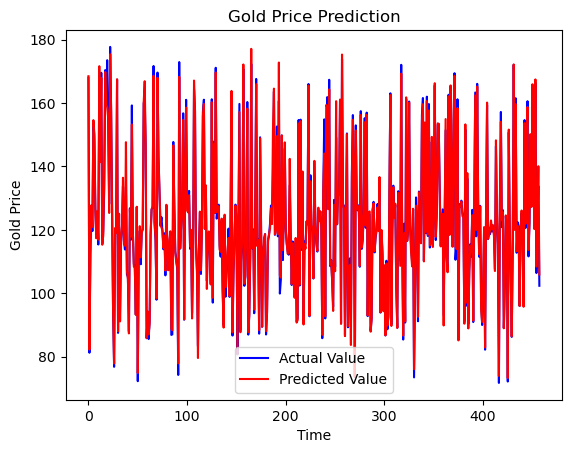

In [39]:
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_predict, color='red', label='Predicted Value')
plt.title('Gold Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()